#### - Sobhan Moradian Daghigh
#### - 12/29/2021
#### - PR - EX02 - Q5 - All Parts

In [166]:
import numpy as np
from PIL import Image
import os, io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as st

In [2]:
dataset = pd.read_csv (r'./inputs/P5/blood_test.txt')
dataset

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcv       345 non-null    int64  
 1   alkphos   345 non-null    int64  
 2   sgpt      345 non-null    int64  
 3   sgot      345 non-null    int64  
 4   gammagt   345 non-null    int64  
 5   drinks    345 non-null    float64
 6   selector  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [4]:
dataset.loc[dataset.drinks > 5 , 'addicted'] = 1
dataset.loc[dataset.drinks <= 5, 'addicted'] = 0

dataset

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector,addicted
0,85,92,45,27,31,0.0,1,0.0
1,85,64,59,32,23,0.0,2,0.0
2,86,54,33,16,54,0.0,2,0.0
3,91,78,34,24,36,0.0,2,0.0
4,87,70,12,28,10,0.0,2,0.0
...,...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1,1.0
341,96,69,53,43,203,12.0,2,1.0
342,98,77,55,35,89,15.0,1,1.0
343,91,68,27,26,14,16.0,1,1.0


In [5]:
groups = dataset.groupby(by='selector')
groups.first()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,addicted
selector,,,,,,,
1,85,92,45,27,31,0.0,0.0
2,85,64,59,32,23,0.0,0.0


In [6]:
sets = []
for grp, pdf in groups:
    df = pd.DataFrame(pdf)
    sets.append(df)

train = sets[0]
test = sets[1]

In [7]:
train.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector,addicted
0,85,92,45,27,31,0.0,1,0.0
6,88,62,20,17,9,0.5,1,0.0
7,88,67,21,11,11,0.5,1,0.0
8,92,54,22,20,7,0.5,1,0.0
9,90,60,25,19,5,0.5,1,0.0


In [8]:
samples10 = train.sample(10, random_state=1)
samples50 = train.sample(50, random_state=2)
samples100 = train.sample(100, random_state=3)

### Part A.

In [9]:
def get_meanCov(datas):
    if datas.empty:
        return [0] * 6, [[0] * 6] * 6
    datas = datas.iloc[:, :-2]
    mean = np.array(datas.mean())
    cov = np.divide(np.dot(np.transpose(np.subtract(datas, mean)), np.subtract(datas, mean)), datas.shape[0])
    return mean, cov

In [10]:
def MLH_params(dataset):
    mcs = []
    mcs.append(get_meanCov(dataset.loc[dataset.addicted == 1]))
    mcs.append(get_meanCov(dataset.loc[dataset.addicted == 0]))
    return mcs

In [11]:
for frame in [dataset, samples10, samples50, samples100]:
    temp = MLH_params(frame)
    print("- [{} Samples]".format(len(frame)))
    for i, cls in zip(range(2), ['Addicted', 'NoAddicted']):
        print("- Class: {}".format(cls))
        print("Mean:")
        df = pd.DataFrame(temp[i][0]).T
        display(df.round(3))
        print("\nCov:")
        df = pd.DataFrame(temp[i][1])
        display(df.round(3))
#         pprint(temp[i][1])
        print('\n-----------------------------------------')

- [345 Samples]
- Class: Addicted
Mean:


,0,1,2,3,4,5
0,92.523,72.886,36.727,28.886,57.17,7.989



Cov:


,0,1,2,3,4,5
0,16.590,9.605,9.404,11.514,64.661,1.267
1,9.605,391.692,41.105,40.885,179.281,14.090
2,9.404,41.105,436.653,151.219,504.535,13.338
3,11.514,40.885,151.219,123.283,318.406,6.828
4,64.661,179.281,504.535,318.406,2456.073,37.945
5,1.267,14.090,13.338,6.828,37.945,8.375



-----------------------------------------
- Class: NoAddicted
Mean:


,0,1,2,3,4,5
0,89.35,68.837,28.241,23.191,31.817,1.903



Cov:


,0,1,2,3,4,5
0,18.235,-1.748,7.071,2.700,9.301,0.855
1,-1.748,312.292,13.678,16.218,40.776,-2.849
2,7.071,13.678,341.732,130.324,288.503,0.292
3,2.700,16.218,130.324,85.096,133.159,1.392
4,9.301,40.776,288.503,133.159,1057.612,7.494
5,0.855,-2.849,0.292,1.392,7.494,2.598



-----------------------------------------
- [10 Samples]
- Class: Addicted
Mean:


,0,1,2,3,4,5
0,93.5,64.5,48.0,27.0,67.5,6.5



Cov:


,0,1,2,3,4,5
0,2.25,-42.75,-15.0,-12.0,-78.75,-0.75
1,-42.75,812.25,285.0,228.0,1496.25,14.25
2,-15.00,285.00,100.0,80.0,525.00,5.00
3,-12.00,228.00,80.0,64.0,420.00,4.00
4,-78.75,1496.25,525.0,420.0,2756.25,26.25
5,-0.75,14.25,5.0,4.0,26.25,0.25



-----------------------------------------
- Class: NoAddicted
Mean:


,0,1,2,3,4,5
0,91.125,69.25,24.875,21.5,35.125,1.625



Cov:


,0,1,2,3,4,5
0,3.609,8.719,-2.359,2.062,-5.016,-0.641
1,8.719,681.188,-72.469,81.750,338.594,-2.094
2,-2.359,-72.469,80.609,-21.438,166.391,0.078
3,2.062,81.750,-21.438,26.750,-15.938,-3.750
4,-5.016,338.594,166.391,-15.938,1463.859,-7.516
5,-0.641,-2.094,0.078,-3.750,-7.516,2.359



-----------------------------------------
- [50 Samples]
- Class: Addicted
Mean:


,0,1,2,3,4,5
0,93.545,77.455,42.364,30.818,46.364,7.727



Cov:


,0,1,2,3,4,5
0,12.430,52.570,18.529,13.826,51.620,-2.488
1,52.570,446.975,-200.347,-28.281,200.289,-2.058
2,18.529,-200.347,586.231,203.430,338.413,-15.355
3,13.826,-28.281,203.430,102.512,258.884,-6.322
4,51.620,200.289,338.413,258.884,1469.504,-17.810
5,-2.488,-2.058,-15.355,-6.322,-17.810,8.017



-----------------------------------------
- Class: NoAddicted
Mean:


,0,1,2,3,4,5
0,89.538,76.769,26.308,20.641,22.923,1.372



Cov:


,0,1,2,3,4,5
0,8.197,-5.491,-5.832,-2.294,5.298,0.620
1,-5.491,393.101,14.892,29.635,104.136,-9.222
2,-5.832,14.892,68.418,14.957,69.793,-0.935
3,-2.294,29.635,14.957,25.410,8.485,-0.302
4,5.298,104.136,69.793,8.485,440.840,-2.151
5,0.620,-9.222,-0.935,-0.302,-2.151,1.766



-----------------------------------------
- [100 Samples]
- Class: Addicted
Mean:


,0,1,2,3,4,5
0,92.469,71.031,40.75,26.906,49.344,8.188



Cov:


,0,1,2,3,4,5
0,9.624,1.173,10.492,7.606,33.308,-0.775
1,1.173,413.343,7.758,21.347,171.989,13.057
2,10.492,7.758,574.562,166.820,539.336,17.109
3,7.606,21.347,166.820,84.397,232.813,5.080
4,33.308,171.989,539.336,232.813,1877.288,69.592
5,-0.775,13.057,17.109,5.080,69.592,10.652



-----------------------------------------
- Class: NoAddicted
Mean:


,0,1,2,3,4,5
0,89.397,72.912,26.603,20.441,22.294,1.441



Cov:


,0,1,2,3,4,5
0,12.710,8.976,2.908,2.207,1.442,0.538
1,8.976,320.963,-9.564,21.304,76.482,-4.255
2,2.908,-9.564,84.622,15.087,93.367,0.749
3,2.207,21.304,15.087,32.599,24.738,0.055
4,1.442,76.482,93.367,24.738,428.561,-0.792
5,0.538,-4.255,0.749,0.055,-0.792,1.607



-----------------------------------------


### Part B.

In [12]:
def cal_prior_probabilities(dataset):
    return np.log(dataset.groupby(by = 'addicted').apply(lambda x: np.divide(len(x), dataset.shape[0]))).values

In [13]:
# Continues with Noraml Distribution
def cal_probability_density(mean, cov, x):
    var = multivariate_normal(mean=mean, cov=cov, allow_singular=True)
    prob = var.pdf(x)
    return prob

In [14]:
def cal_likelihood_probabilities(test_row, mean, cov):
    
    likelihood_probabilities = []
    
    for i in range(2): # Unique labels
        likelihood = 0
        likelihood = np.log(cal_probability_density(mean[i], cov[i], test_row))
        likelihood_probabilities.append(likelihood)

    return likelihood_probabilities

In [15]:
def BC(test_dataset, periors, mean, cov):
    predictions = []
    for i in range(test_dataset.shape[0]):
        
        likelihood = cal_likelihood_probabilities(test_dataset.iloc[i, :], mean, cov)

        # log(a*b) = loga + logb
        probabilities = periors + likelihood
        
        mx_idx = np.argmax(probabilities)
        predictions.append([1, 0][mx_idx])

    return predictions

In [17]:
periors = cal_prior_probabilities(train)

for frame in [samples10, samples50, samples100]:
    temp = MLH_params(frame)
    mean, cov = [temp[0][0], temp[1][0]], [temp[0][1], temp[1][1]]
    predictions = BC(test.iloc[:, :-2], periors, mean, cov)
    accuracy = accuracy_score(test.iloc[:, -1], predictions)
    cm = confusion_matrix(test.iloc[:, -1], predictions, labels=[1, 0])
    print('Accuracy: \n{}\n'.format(accuracy))
    print('Confusion Matrix: \n{}\n'.format(cm))    

Accuracy: 
0.215

Confusion Matrix: 
[[ 43   0]
 [157   0]]

Accuracy: 
0.865

Confusion Matrix: 
[[ 38   5]
 [ 22 135]]

Accuracy: 
0.77

Confusion Matrix: 
[[ 43   0]
 [ 46 111]]



### Part D.


In [33]:
def feature_selection(dataset):
    pairs = []
    for i in range(dataset.shape[1] - 2):
        for j in range(i + 1, dataset.shape[1] - 2):
            pairs.append([i, j])
    return pairs

In [67]:
pairs = feature_selection(train)

In [75]:
periors = cal_prior_probabilities(train)

for pair in pairs:
    df = pd.DataFrame([test.iloc[:, x] for x in pair]).T
    temp = MLH_params(pd.DataFrame([samples100.iloc[:, x] for x in pair + [6, 7]]).T)
    mean, cov = [temp[0][0], temp[1][0]], [temp[0][1], temp[1][1]]

    predictions = BC(df, periors, mean, cov)
    accuracy = accuracy_score(test.iloc[:, -1], predictions)
    cm = confusion_matrix(test.iloc[:, -1], predictions, labels=[1, 0])
    print("Parameters: {} and {}".format(test.columns[pair[0]], test.columns[pair[1]]))
    print('Accuracy: \n{}'.format(accuracy))
    print('Confusion Matrix: \n{}'.format(cm))
    print("---------------------------")

Parameters: mcv and alkphos
Accuracy: 
0.485
Confusion Matrix: 
[[35  8]
 [95 62]]
---------------------------
Parameters: mcv and sgpt
Accuracy: 
0.56
Confusion Matrix: 
[[30 13]
 [75 82]]
---------------------------
Parameters: mcv and sgot
Accuracy: 
0.52
Confusion Matrix: 
[[35  8]
 [88 69]]
---------------------------
Parameters: mcv and gammagt
Accuracy: 
0.56
Confusion Matrix: 
[[32 11]
 [77 80]]
---------------------------
Parameters: mcv and drinks
Accuracy: 
0.785
Confusion Matrix: 
[[ 43   0]
 [ 43 114]]
---------------------------
Parameters: alkphos and sgpt
Accuracy: 
0.535
Confusion Matrix: 
[[21 22]
 [71 86]]
---------------------------
Parameters: alkphos and sgot
Accuracy: 
0.415
Confusion Matrix: 
[[ 39   4]
 [113  44]]
---------------------------
Parameters: alkphos and gammagt
Accuracy: 
0.55
Confusion Matrix: 
[[34  9]
 [81 76]]
---------------------------
Parameters: alkphos and drinks
Accuracy: 
0.715
Confusion Matrix: 
[[ 43   0]
 [ 57 100]]
-------------------

#### Winner:  alkphos & drinks

In [76]:
# Parameters: alkphos and drinks
# Accuracy: 
# 0.715
# Confusion Matrix: 
# [[ 43   0]
#  [ 57 100]]

In [167]:
x = test.loc[:, 'alkphos']
y = test.loc[:, 'drinks']

deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [168]:
ts = pd.DataFrame([samples100.iloc[:, x] for x in [1, 5, 6, 7]]).T
temp = MLH_params(ts)
mean, cov = [temp[0][0], temp[1][0]], [temp[0][1], temp[1][1]]

addic = []
noAddic = []
for i in range(xx.shape[0]):
    for j in range(xx.shape[0]):
        addic.append(cal_probability_density(mean[0], cov[0], pd.DataFrame([xx[i][j], yy[i][j]]).T))
        noAddic.append(cal_probability_density(mean[1], cov[1], pd.DataFrame([xx[i][j], yy[i][j]]).T))

In [169]:
addic = np.reshape(np.array(addic), xx.shape)
noAddic = np.reshape(np.array(noAddic), xx.shape)

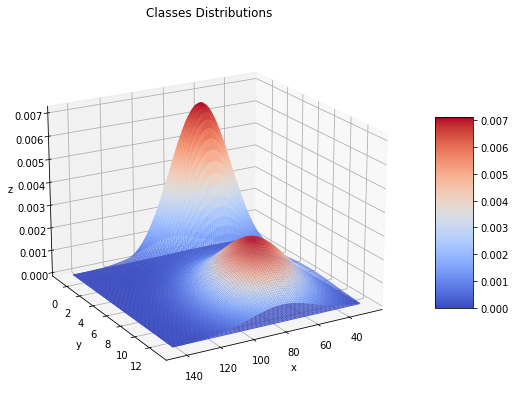

In [176]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
for distri in [addic, noAddic]:
    surf = ax.plot_surface(xx, yy, distri, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Classes Distributions')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(20, 60)